In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Drug dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

https://www.kaggle.com/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

In [2]:
# Import the dataset
data = pd.read_csv('../exercises/data/drugs.csv',index_col=0)
# Show the first few rows
data.head()

,Sex,BP,Cholesterol,Na_to_K,Drug
Age,,,,,
23,F,HIGH,HIGH,25.355,drugY
47,M,LOW,HIGH,13.093,drugC
47,M,LOW,HIGH,10.114,drugC
28,F,NORMAL,HIGH,7.798,drugX
61,F,LOW,HIGH,18.043,drugY


In [3]:
# Look at the total amount of rows and columns
print("Rows, columns:",data.shape)

Rows, columns: (200, 5)


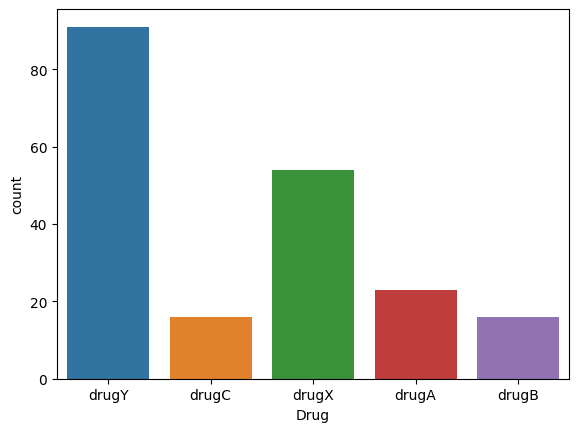

In [4]:
# Show the distribution of the target column
fig = plt.figure(figsize=plt.figaspect(0.33))

ax = fig.add_subplot(1,2,2)
_=sns.countplot(x="Drug",data=data,ax=ax, hue='Drug')

In [5]:
# Split into features and target
X= data.drop("Drug",axis=1) #features
y= data["Drug"] #target

In [6]:
# Find a way to change the categorical (text) features into numeric features.
# Different options are available. The best one being LabelEncoder():
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# 
# Other options are one-hot encoding and pd.get_dummies functions
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

le = LabelEncoder()
le.fit(X.BP)
list(le.classes_)
X.BP = le.transform(X.BP)

le = LabelEncoder()
le.fit(X.Sex)
list(le.classes_)
X.Sex = le.transform(X.Sex)

le = LabelEncoder()
le.fit(X.Cholesterol)
list(le.classes_)
X.Cholesterol = le.transform(X.Cholesterol)

In [7]:
X.BP

Age
23    0
47    1
47    1
28    2
61    1
     ..
56    1
16    1
52    2
23    2
40    1
Name: BP, Length: 200, dtype: int64

In [8]:
X.Sex

Age
23    0
47    1
47    1
28    0
61    0
     ..
56    0
16    1
52    1
23    1
40    0
Name: Sex, Length: 200, dtype: int64

In [9]:
X.Cholesterol

Age
23    0
47    0
47    0
28    0
61    0
     ..
56    0
16    0
52    0
23    1
40    1
Name: Cholesterol, Length: 200, dtype: int64

In [10]:
# Split into a training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [11]:
# Create a random forest classifier model. Set max_depth parameter to 2
# You also might wanna play with the class_weight parameter
model=RandomForestClassifier(max_depth=2, class_weight="balanced")
# Fit the model
model.fit(X_train,y_train)
# Print the score on the test set
print("Score:",model.score(X_test,y_test))

Score: 0.8


In [12]:
# Predict values for the test set
y_pred = model.predict(X_test)
# Print a confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 1  1  0  0  0]
 [ 2  0  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  5 10  0]
 [ 0  0  0  0 18]]
              precision    recall  f1-score   support

       drugA       0.33      0.50      0.40         2
       drugB       0.00      0.00      0.00         2
       drugC       0.38      1.00      0.55         3
       drugX       1.00      0.67      0.80        15
       drugY       1.00      1.00      1.00        18

    accuracy                           0.80        40
   macro avg       0.54      0.63      0.55        40
weighted avg       0.87      0.80      0.81        40



## Hyperparameter optimizations
Use a grid, random or bayes search to do some hyperparameter optimizations.

For possible hyperparameters to tune, take a look at the documentation of random forest trees:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Keep max_depth at 1 and/or 2, as otherwise, your tree would get everything right in the training set.

Note there is not really a right answer. It's just about trying different things and seeing if you can implement a search yourself.

In [14]:
# Optimizations grid
from sklearn.model_selection import GridSearchCV

basemodel = RandomForestClassifier()
parameters = [{
    "n_estimators": [50,100,150],
    "criterion": ["gini", "entropy"],
    "max_depth": [1,2],
    "max_features": ["sqrt","log2", None],
    "class_weight":["balanced","balanced_subsample", None],
    "max_samples": [0.5,0.7,0.9]
}]
gsearch = GridSearchCV(estimator=basemodel, param_grid=parameters, cv=5, n_jobs=1, verbose=5)

gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=1, max_features=sqrt, max_samples=0.5, n_estimators=50;, score=0.844 total time=   0.1s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=1, max_features=sqrt, max_samples=0.5, n_estimators=50;, score=0.812 total time=   0.1s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=1, max_features=sqrt, max_samples=0.5, n_estimators=50;, score=0.750 total time=   0.3s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=1, max_features=sqrt, max_samples=0.5, n_estimators=50;, score=0.750 total time=   0.4s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=1, max_features=sqrt, max_samples=0.5, n_estimators=50;, score=0.844 total time=   0.1s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=1, max_features=sqrt, max_samples=0.5, n_estimators=100;, score=0.719 total time=   0.4s
[CV 2/5] END class_weight=balanced,

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample',
                                           None],
                          'criterion': ['gini', 'entropy'], 'max_depth': [1, 2],
                          'max_features': ['sqrt', 'log2', None],
                          'max_samples': [0.5, 0.7, 0.9],
                          'n_estimators': [50, 100, 150]}],
             verbose=5)

In [ ]:
# Optimizations random
from sklearn.model_selection import GridSearchCV

# The base model we want to test
model = LogisticRegression(max_iter=1000)
# All the parameters we want to test
parameters = [{"C":np.linspace(0.01,20,10), # linspace will evenly space values between a start and a stop. 
                                            # In this case 10 values evenly spaced between 0.01 and 20
              "penalty":["l1","l2"], # All penalties we want to check, we could also add `None` 
              "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}] # The solvers to use 
                                                                            # (different underlying algorithms, see docs)

# Constructing the grid search "model"
grid_search = GridSearchCV(estimator=model,             # The base model
                           cv=5,                        # Number of cross fold validations
                           param_grid=parameters,       # Different parameters to test
                           n_jobs=-1,                   # Number of threads to use (-1: all)
                           verbose=5,                   # How much information do we want to show? See docs for more info
                           scoring="balanced_accuracy") # What score will the model be evaluated on?
                                                        # See: https://scikit-learn.org/stable/modules/classes.html?highlight=metric#module-sklearn.metrics
# Fit the training data
grid_search.fit(X_train,y_train)

In [ ]:
# Optimizations bayens
from skopt import BayesSearchCV
from skopt.space import Real,Categorical

# The base model
model = LogisticRegression(max_iter=1000)

# The parameters
parameters = [{"C":Real(0.01,20,prior="uniform"), #Instead of uniform, we now need to use Real with prior uniform
              "solver":Categorical(["newton-cg", "lbfgs", "liblinear", "sag", "saga"])}] 
                      # Instead of normal list, we now need to wrap it into a Categorical
    
# Number of searches our model is allowed to do
n_iter_search = 100

# The bayes_search 'model' similar to grid and random search
bayes_search = BayesSearchCV(estimator=model,
                                   cv=5,
                                   search_spaces=parameters,
                                   n_iter=n_iter_search,
                                   n_jobs=-1,
                                   verbose=5)
# Fit on the training data
bayes_search.fit(X_train,y_train)
# Print the sores of the best model
print(f"Score of best model: {bayes_search.score(X_test,y_test)}")

# Predict the classes of test set
y_pred=bayes_search.predict(X_test)

# Print classification report
print("\nClassification report:")
print(classification_report(y_test,y_pred))

#Print the best parameters
print("\nBest parameters:")
print(bayes_search.best_params_)
print(bayes_search.best_estimator_)

In [16]:
# Print the score of the best model of your search
print(gsearch.score(X_test, y_test))
# Print the parameters that give you the best model
print(gsearch.best_params_)
print(gsearch.best_estimator_)

0.825
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'max_samples': 0.5, 'n_estimators': 100}
RandomForestClassifier(class_weight='balanced', max_depth=2,
                       max_features='log2', max_samples=0.5)


## Boosting
Try now to also create a boosted model for the random forest trees and test the model.

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gradientboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.8, max_depth=1)
clf_gradientboost.fit(X_train, y_train)
y_pred = clf_gradientboost.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(clf_gradientboost.score(X_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.50      0.50      0.50         2
       drugB       0.50      0.50      0.50         2
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        15
       drugY       1.00      1.00      1.00        18

    accuracy                           0.95        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.95      0.95      0.95        40

[[ 1  1  0  0  0]
 [ 1  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 15  0]
 [ 0  0  0  0 18]]
1.0
